In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train, y_train = data[0]
X_test, y_test = data[1]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Flatten 2D images to 1D vectors
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
print(X_train.shape)
print(X_test.shape)
input_dim = X_train.shape[1]

# Look at number of classes, and convert target to one-hot encoding
n_classes = len(np.unique(y_train))
print(n_classes, 'classes')
y_train = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 784)
(10000, 784)
10 classes
(60000, 10)
(10000, 10)


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optim = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history = model.fit(X_train, y_train, batch_size=2048, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 1s 18ms/step - loss: 21.4742 - accuracy: 0.1375 - val_loss: 2.3039 - val_accuracy: 0.1016
Epoch 2/50
30/30 [==============================] - 0s 13ms/step - loss: 2.3030 - accuracy: 0.1023 - val_loss: 2.3019 - val_accuracy: 0.1011
Epoch 3/50
30/30 [==============================] - 0s 13ms/step - loss: 2.3014 - accuracy: 0.1080 - val_loss: 2.3010 - val_accuracy: 0.1136
Epoch 4/50
30/30 [==============================] - 0s 14ms/step - loss: 2.3011 - accuracy: 0.1125 - val_loss: 2.3008 - val_accuracy: 0.1136
Epoch 5/50
30/30 [==============================] - 0s 13ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3007 - val_accuracy: 0.1137
Epoch 6/50
30/30 [==============================] - 0s 14ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3007 - val_accuracy: 0.1137
Epoch 7/50
30/30 [==============================] - 0s 13ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3006 - val_accuracy: 0.1137
Epoch 8/50
3

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

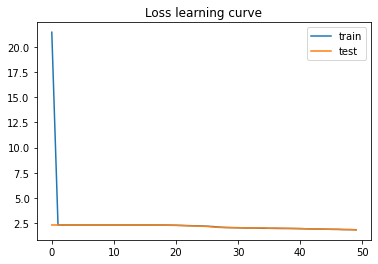

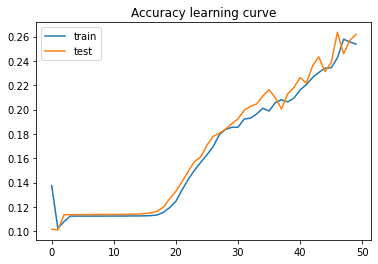

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()